In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
import timeit
# import weno_coefficients
from numba import jit, int8, float32
from math import factorial
import tqdm
import h5py

In [32]:
fs1 = []
fs2 = []
fs3 = []
for n in range(6):
  fs1.append(h5py.File('ISCE/KH/Ideal/dp_800x800x0_'+str(n)+'.hdf5','r'))
fss = [fs1]

In [33]:
fs1[0]['Auxiliary'].keys()

<KeysViewHDF5 ['PiLO', 'PiNS', 'T', 'Theta', 'W', 'a1', 'a2', 'a3', 'dtD', 'dtE', 'dtPiNS', 'dtS1', 'dtS2', 'dtS3', 'dtT', 'dtTau', 'dtW', 'dtn', 'dtp', 'dtpi11NS', 'dtpi12NS', 'dtpi13NS', 'dtpi22NS', 'dtpi23NS', 'dtpi33NS', 'dtq1NS', 'dtq2NS', 'dtq3NS', 'dtrho', 'dtv1', 'dtv2', 'dtv3', 'e', 'h', 'pi00', 'pi01', 'pi02', 'pi03', 'pi11LO', 'pi11NS', 'pi12LO', 'pi12NS', 'pi13LO', 'pi13NS', 'pi22LO', 'pi22NS', 'pi23LO', 'pi23NS', 'pi33LO', 'pi33NS', 'q0', 'q1LO', 'q1NS', 'q2LO', 'q2NS', 'q3NS', 'qLO', 'qv', 'vsqrd']>

In [37]:
# fs1[0]['Auxiliary/dtn']

In [47]:
i = j = 200
vel_4vec = [fs1[1]['Auxiliary/dtW'][i,j],fs1[1]['Primitive/v1'][i,j],fs1[1]['Primitive/v2'][i,j]]
normal_4vec = [0,0,0]

In [48]:
vel_4vec

[-0.14859611805217338, 0.6663329924293803, 0.30035212289609214]

In [51]:
np.dot(vel_4vec,normal_4vec)

0.0

In [49]:
normal_4vec

[0, 0, 0]

In [52]:
def residual(vec2):
    i = j = 200
    vec1 = [fs1[1]['Auxiliary/dtW'][i,j],fs1[1]['Primitive/v1'][i,j],fs1[1]['Primitive/v2'][i,j]]
    return np.dot(vec1,vec2) + (np.dot(vec2,vec2)+1.0)

In [56]:
sol = minimize(residual)

TypeError: minimize() missing 1 required positional argument: 'x0'

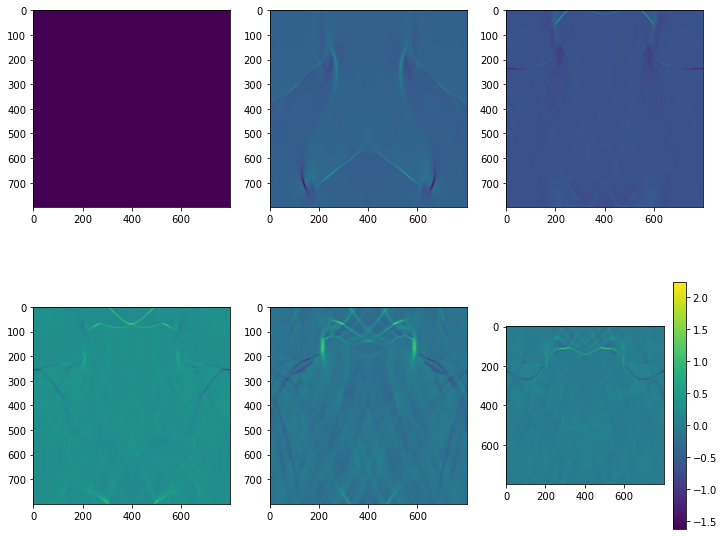

In [35]:
fig, axes = plt.subplots(2,3,figsize=(12,10))
for fs, axis in zip(fss[0], axes.flatten()):
#     axis.imshow(fs['Primitive/v1'])
    cax = axis.imshow(fs['Auxiliary/dtv1'])

plt.colorbar(cax)
plt.show()